# Aprendizaje/inferencia estadística

El aprendizaje estadístico es el proceso mediante el cual utilizamos datos para inferir una distribución de probabilidad que les corresponda. 

En lo siguiente consideraremos datos con valores reales $\pmb{X}=(X_1,\ldots, X_n)\in\mathbb{R}^n$ tales que $X_i\sim P$ son mutuamente independientes, con $P$ una ley de probabilidad,  $i\in\left\{1,\ldots ,n\right\}$. Denotamos esto como $\left\{ X_i \right\}_{i=1}^\infty \stackrel{\text{i.i.d.}}{\sim}P$ y decimos que $n$ es el tamaño de muestra de los datos.

#### Modelo probabilístico

Un conjunto de leyes de probabilidad $\mathcal{P}$ es llamado un modelo probabilístico para los datos. Podemos considerar los siguientes ejemplos

1) **Modelo no paramétrico clásico** Dados datos observados $\left\{ X_i \right\}_{i=1}^n \stackrel{\text{i.i.d.}}{\sim}P_0$, consideramos el modelo 

$$\mathcal{P}=\left\{ \begin{aligned} & \text{ Distribuciones discretas de probabilidad con átomos } \\ 
   &\text{ únicamente en }X_1,,\ldots,X_n.\end{aligned}\right\},$$
   
   i.e. si $P\in\mathcal{P}$ entonces $P$ tiene una función de masa de probabilidad asociada $$p(\cdot)=\sum_{i=1}^n w_i\delta_{X_i}(\cdot)$$ con $\pmb{w}=(w_1,\ldots,w_n)\in\mathbb{S}_n = \left\{ \left( w_1,\ldots , w_n \right) \in [0,1]^n \, : \, \sum_{i=1}^n w_i=1 \right\}.$

2) **Modelo paramétrico general** Consideramos distribuciones de probabilidad parametrizadas por un valor $\pmb{\theta}\in\mathbb{\Theta}\subset \mathbb{R}^k$, para algún $k\geq 1$, y las denotamos como $\mathcal{P}_{\pmb{\theta}}$. Llamamos modelo probabilístico paramétrico a $$\mathcal{P}_{\text{Dist}(\pmb{\theta})}=\left\{ P_{\pmb{\theta}} \right\}_{\pmb{\theta} \in \mathbb{\Theta}}.$$

## Verosimilitud y su maximización

Sean datos $\left\{ X_i \right\}_{i=1}^\infty \stackrel{\text{i.i.d.}}{\sim}P_0$ y $\mathcal{P}$ un modelo para los datos. Supongamos que $P\in\mathcal{P}$ tiene una función de masa ó densida de probabilidad, en ambos casos, denotada $p$ entonces la función de verosimilitud de $P$ se define como

$$
L(p;\pmb{X}) = \prod_{i=1}^n p(X_i).
$$

Es usual omitir el argumento de los datos en la verosimilitu, i.e. se usa $L(p)$. Cuando se desea enfatizar la dependencia de la verosimilitud, o cantidades asociadas, con el tamñao de muestra se suele utilizar un sub-índice $n$, por ejemplo $L_n(p)$.

### Ejemplos

1) Para el **modelo no paramétrico clásico** denotamos $X_{(1)}<X_{(2)}<\ldots<X_{(k)}$ los valores únicos sin repeticiones de los datos, con $k\leq n$, $n_j=\#\left\{ i\,:\, X_i = X_{(j)}\right\}$ y $w_{(j)}=\sum_{\left\{ i \,:\, X_i=X_{(j)}\right\}} w_i$; entonces la verosimilitud está dada por $$L(\pmb{w}) = \prod_{j=1}^k w_{(j)}^{n_j},$$ donde hemos identificado a los elementos $P\in\mathcal{P}$ con sus correspondientes pesos $\pmb{w}=(w_1,\ldots,w_n)$.

2) Para el **modelo paramétrico general** la verosimilitud está dada por $$L(p_\theta) = \prod_{i=1}^n p_\theta(X_i).$$ Usualmente se denota $L(\pmb{\theta};\pmb{X})$ ó $L(\pmb{\theta})$ en el modelo paramétrico. 

### Estimación máximo verosímil

El principio de máxima verosimilitud nos dice que dentro de nuestro modelos probabilístico debemos preferir distribuciones que tengan mayor verosimilitud. Se sigue que la distribución a inferir está dada por

$$
P_{\text{ML}} = \underset{{P\in\mathcal{P}}}{\arg \max}\:L(P).
$$

A tal estimador de la distribución de probabilidad verdadera $P_0$ se le llama estimador máximo verosímil. El uso de $\text{ML}$ en la notación corresponde a las siglas de $\textit{maximum likelihood}$. 

### Ejemplos

1) Para el **modelo no paramétrico clásico** optimizamos $$L(\pmb{w}) = \prod_{j=1}^k w_{(j)}^{n_j}.$$ Tal problema tiene solución utilizando multiplicadores de Lagrange con la restricción $\sum_{j=1}^{k} w_{(j)}=1$. Se tiene que 

$$\pmb{w}_{\text{ML}}=\left( \frac{n_1}{k},\ldots,\frac{n_k}{k}\right)$$ 

por lo que la distribución máximo verosímil asociada coincide con la distribución empírica, usualmente denotada $\hat{P}_n$, 

$$P_{\text{ML}}=\sum_{i=1}^n \frac{1}{n}\delta_{X_i}=\sum_{i=1}^k\frac{n_i}{n}\delta_{X_{(i)}}.$$

In [1]:
using Distributions, Optim, HCubature, DataFrames, CSV, Plots, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

In [2]:
gfr = CSV.read("../Datasets/gfr.txt",DataFrame)[:,1];

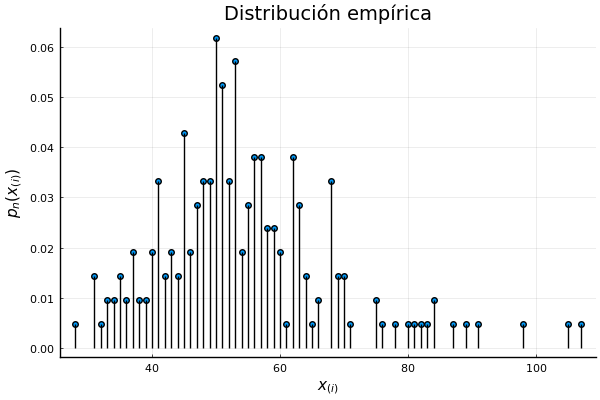

In [3]:
frec = [ sum(gfr.==v) for v in unique(gfr) ]./length(gfr);
p=scatter(unique(gfr), frec,label="")
for i in 1:length(frec)
    plot!(p, [unique(gfr)[i],unique(gfr)[i]], [0.0,frec[i]], c=:black, label="" )
end
xlabel!(L"x_{(i)}")
ylabel!(L"p_n(x_{(i)})")
title!("Distribución empírica")

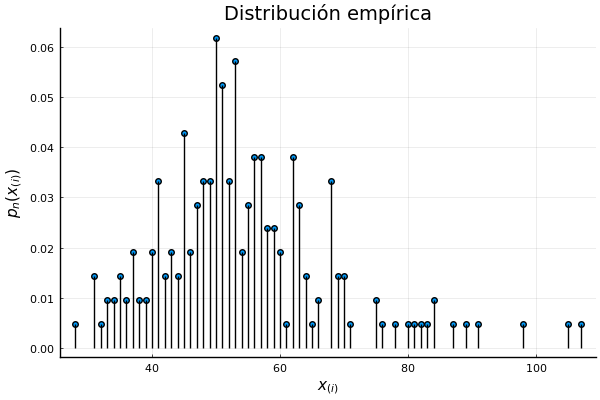

In [4]:
p

Análogamente se puede determinar un histograma, fijando las celdas, como un estimador máximo verosimil. 

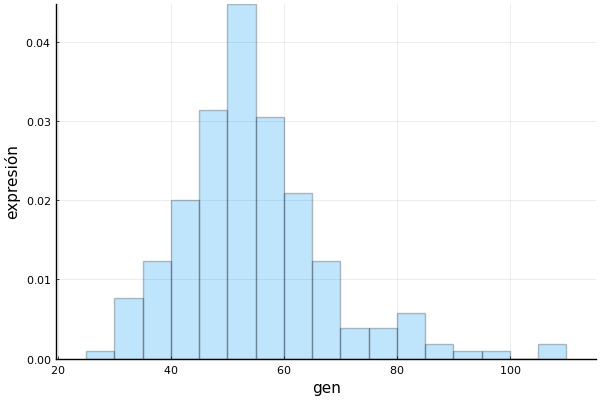

In [3]:
histogram(gfr,normalize=true,label="",alpha=0.25,xlabel="gen",ylabel="expresión")

2) Para el **modelo paramétrico general** la verosimilitud está dada por $$L(p_{\pmb{\theta}}) = \prod_{i=1}^n p_{\pmb{\theta}}(X_i).$$ Usualmente se denota $L(\pmb{\theta};\pmb{X})$ ó $L(\pmb{\theta})$ en el modelo paramétrico.

En tal caso la distribución máximo verosimil dentro del modelo queda determinada por la elección del parámetro

$$
\hat{\pmb{\theta}}_{\text{ML}} = \underset{{\pmb{\theta}\in\pmb{\Theta}}}{\arg \max}\:L(\pmb{\theta}).
$$

En el contexto paramétrico se dice que $\hat{\pmb{\theta}}_{\text{ML}}$ es el estimador máximo verosimil de $\pmb{\theta}$.

Tanto para resolver la maximización de la verosimilitud analítica ó numéricamente es conveniente hacer uso de la función logaritmo. Se define en general la función de logverosimilitud

$$
l(P)=\log\left( L(P) \right)
$$

y se usa notación análoga a la de la función de verosimilitud.

### Ejemplo modelo Gaussiano

2.1) Modelo (paramétrico) Gaussiano. Consideramos el modelo Gaussiano

$$
\mathcal{P}_{\text{Normal}(\mu,\sigma^2)}= \left\{ \text{distribuciones en }\mathbb{R}\text{ con pdf } f(x)=\frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} \right\}_{\mu\in\mathbb{R},\sigma>0}
$$

En tal caso se puede verificar que el estimador máximo verosimil está dado por $\hat{\pmb{\theta}}_{\text{ML}}=\left( \hat{\mu}_{\text{ML}} ,\hat{\sigma}^2_{\text{ML}}  \right)$ con

$$
\hat{\mu}_{\text{ML}} = \frac{1}{n}\sum_{i=1}^n X_i
$$

y

$$
\hat{\sigma}^2_{\text{ML}} = \frac{1}{n}\sum_{i=1}^n \left( X_i - \hat{\mu}_{\text{ML}} \right)^2. 
$$

In [4]:
Dmle = fit_mle(Normal,gfr)

Normal{Float64}(μ=54.00952380952381, σ=13.207858582854046)

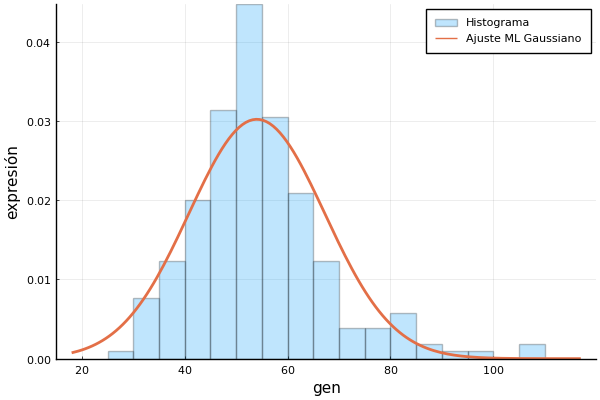

In [6]:
p=histogram(gfr,normalize=true,label="Histograma",alpha=0.25,xlabel="gen",ylabel="expresión")
t_gfr = LinRange(minimum(gfr)-10,maximum(gfr)+10,150)
plot!(t_gfr, pdf.(Dmle,t_gfr),linewidth=2,label="Ajuste ML Gaussiano")

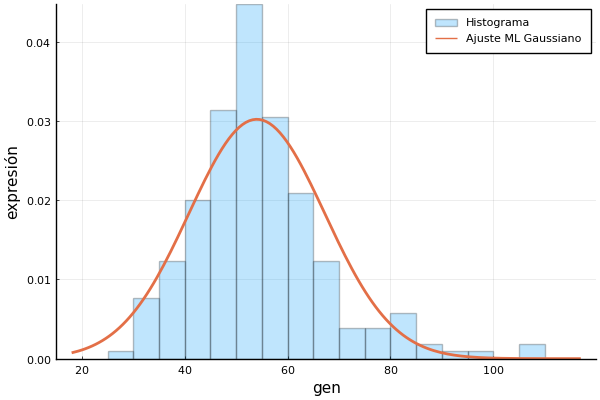

In [7]:
p

### Estadísticos

Tanto en el contexto no-paramétrico como paramétrico, las distribución estimada depende de los datos observados. En ese sentido, se le llama **estadístcos** a cualquier función de los datos $T=T(X_1,\ldots,X_n)$.

Ejemplo

1)  Modelo no-paramétrico clásico. La función de distribución cumulativa (cdf por las siglas en ingles de $\textit{cumulative distribution function}$) de la distribución empírica denoatada $\hat{F}_n$ es un estadístcio que estima a la cdf $F_0$ que genera los datos i.i.d. observados.

2) Modelo Gaussiano. El estadistico $\hat{\mu}_{\text{ML}}$ es un estimador de la media $\mu_0$ y el estadístico $\hat{\sigma}^2_{\text{ML}}$ es un estimador de la varianza $\sigma^2_0$ correspondientes a la distribución $\text{Normal}(\mu_0,\sigma^2_0)$ que genera los datos i.i.d. observados.

### Sesgo

Es de interés la media y varainza de los estadístico utilizados para estimación. Se define el sesgo de un estadístico que estima a $T_0$ como

$$
\mathbb{E}_{X_1,\ldots,X_n\stackrel{\text{i.i.d.}}{\sim}P_0}\left[  T(X_1,\ldots,X_n) \right] - T_0 .
$$

También se dice que tal cantidad es el sesgo de $T$ para estimar $T_0$.

Ejemplo

1)  Modelo no-paramétrico clásico. El sesgo de $\hat{F}_n$ para estimar $F_0$ es cero, ya que $$\mathbb{E}_{X_1,\ldots,X_n\stackrel{\text{i.i.d.}}{\sim}P_0}\left[ \frac{1}{n}\sum_{i=1}^n \pmb{1}\left\{X_i \leq x \right\} - F_0(x) \right]=0 $$ para $x\in\mathbb{R}$ arbitrario. Por otro lado para $h\,:\,\mathbb{R} \to \,\mathbb{R}$ arbitrario $\mathbb{E}_{X\sim\hat{F}_n}\left[h(X)\right]$ es un estimador insesgado para $\mathbb{E}_{X\sim F_0}\left[h(X)\right]$ pues \begin{align*}\mathbb{E}_{X_1,\ldots,X_n\stackrel{\text{i.i.d.}}{\sim}P_0}\left[  \int h(x)\mathrm{d}\hat{F}_n(x) - \int h(x)\mathrm{d}F_0(x)  \right]&= \mathbb{E}_{X_1,\ldots,X_n\stackrel{\text{i.i.d.}}{\sim}P_0}\left[  \frac{1}{n}\sum_{i=1}^n \int h(x)\mathrm{\delta}_{X_i}(x)\mathrm{d}x  - \int h(x)\mathrm{d}F_0(x)  \right] \\ &= \mathbb{E}_{X_1,\ldots,X_n\stackrel{\text{i.i.d.}}{\sim}P_0}\left[  \frac{1}{n}\sum_{i=1}^n h(X_i)  - \int h(x)\mathrm{d}F_0(x) \right]=0 \end{align*}

En particular notamos que la media muestral $\bar{X}=\sum_{i=1}^n X_i$ siempre es insesgada.

2. Modelo Gaussiano. El sesgo de $\hat{\mu}_{\text{ML}}$ para $\mu_0$ es $$\mathbb{E}_{X_1,\ldots,X_n\stackrel{\text{i.i.d.}}{\sim}P_{\text{Normal}(\mu_0,\sigma^2_0)}}\left[ \frac{1}{n}\sum_{i=1}^n X_i  \right]- \mu_0=0.$$ 

y el estadístico $\hat{\sigma}^2_{\text{ML}}$ es un estimador de la varianza $\sigma^2_0$ correspondientes a la distribución $\text{Normal}(\mu_0,\sigma^2_0)$ que genera los datos i.i.d. observados.

Podemos ver que

\begin{align*}
&\mathbb{E}_{\pmb{X}\stackrel{\text{i.i.d.}}{\sim}P_{\text{Normal}(\mu_0,\sigma^2_0)}}\left[ \hat{\sigma}^2_{\text{ML}}  \right] =
\mathbb{E}_{\pmb{X}\stackrel{\text{i.i.d.}}{\sim}P_{\text{Normal}(\mu_0,\sigma^2_0)}}\left[ \frac{1}{n}\sum_{i=1}^n \left( X_i-\bar{X}\right)^2  \right] \\&=
\mathbb{E}_{\pmb{X}\stackrel{\text{i.i.d.}}{\sim}P_{\text{Normal}(\mu_0,\sigma^2_0)}}\left[ \frac{1}{n}\sum_{i=1}^n \left( X_i-\mu_0\right)^2  \right] +\frac{2}{n}
\mathbb{E}_{\pmb{X}\stackrel{\text{i.i.d.}}{\sim}P_{\text{Normal}(\mu_0,\sigma^2_0)}}\left[ \sum_{i=1}^n \left( X_i-\mu_0\right)\left( \mu_0-\bar{X}\right)  \right] +\mathbb{E}_{\pmb{X}\stackrel{\text{i.i.d.}}{\sim}P_{\text{Normal}(\mu_0,\sigma^2_0)}}\left[ \frac{1}{n}\sum_{i=1}^n \left( \mu_0-\bar{X}\right)^2  \right]
\\ & = \sigma_0^2 - \frac{\sigma_0^2}{n} = \sigma_0^2\frac{(n-1)}{n}
\end{align*}

Se sigue que $\hat{\sigma}^2_{\text{ML}}$ no es insesgado pero $s^2_n\stackrel{\text{def.}}{=}\frac{1}{n-1}\sum_{i=1}^n \left( X_i-\bar{X}\right)^2$ si es insegado para $\sigma_0^2$.

### Ejemplo regresión lineal

2.2) Modelo de regresión lineal

$$
\mathcal{P}_{\text{Normal}(\beta_0 + \beta_1 x_1 + \ldots \beta_p x_p,\sigma^2)}= \left\{ \text{distribuciones en }\mathbb{R}\text{ con pdf } f(y)=\frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{\left(y-(\beta_0 + \beta_1 x_1 + \ldots \beta_p x_p) \right)^2}{2\sigma^2}} \right\}_{\mu\in\mathbb{R},\sigma>0}
$$

En este caso las observaciones i.i.d. del modelo de regresión lineal deben de ir acompañadas por covariables $\pmb{X}=(1,X_1,\ldots,X_d)'$ con $d$ el número de éstas. 

Se denota la matriz de diseño

$$
\hat{\pmb{X}} = \left( \begin{matrix}
\,1 & X_{1,1} & \cdots & X_{1,d} \\
\,1 & X_{2,1} & \cdots & X_{2,d} \\
\,\vdots & \vdots & \ddots & \vdots \\
\, 1 & X_{n,1} & \cdots & X_{n,d} \\
\end{matrix}\right).
$$

Las observaciones toman la forma $\left\{ (Y_i,\pmb{X}_i) \right\}_{i=1}^n$ donde

$$
Y_i\,|\, \hat{\pmb{X}} \stackrel{\text{i.i.d.}}{\sim}\text{Normal}(\pmb{X}_i' \pmb{\beta},\sigma^2)
$$

con $\pmb{\beta}=(\beta_0,\ldots,\beta_{d})'.$

Es usual centrar o estandarizar los vectores de covariables para evitar problemas numéricos.

El estimador ML de $\pmb{\beta}=(\beta_0,\beta_1,\ldots,\beta_d)'$ está dado por

$$
\hat{\pmb{\beta}}_{\text{ML}} = \left( \pmb{X}'\pmb{X} \right)^{-1}\pmb{X}'\pmb{y}$$

Poro otro lado el estimador ML para el parámetro de varianza $\sigma^2$ está dado por

$$
\hat{\sigma}^2_{\text{ML}} = \frac{1}{n}\sum_{i=1}^n \hat{\epsilon}_i^2
$$

con 

$$
\hat{\epsilon}_i = (\pmb{y}-\pmb{X}\pmb{\beta}).
$$

Alternativamente se suele utilizar el estimador insesgado para $\sigma^2$

$$
\hat{\sigma}^2 = \frac{1}{n-p}\sum_{i=1}^n \hat{\epsilon}_i^2.
$$

In [9]:
# Ejemplo: datos extensión capa polar norte
seaice = CSV.read("../Datasets/mi_yearlyseaicenorth.csv", DataFrame)

Row,year,extent_north
,Int64,Float64
1,1979,12.4367
2,1980,12.2908
3,1981,12.205
4,1982,12.3842
5,1983,12.3958
6,1984,11.9975
7,1985,11.9958
8,1986,12.1742
9,1987,12.27


In [73]:
x = (seaice.year .- minimum(seaice.year))/( maximum(seaice.year) - minimum(seaice.year));

In [74]:
X = hcat(fill!(similar(x), 1), x)

45×2 Matrix{Float64}:
 1.0  0.0
 1.0  0.0227273
 1.0  0.0454545
 1.0  0.0681818
 1.0  0.0909091
 1.0  0.113636
 1.0  0.136364
 1.0  0.159091
 1.0  0.181818
 1.0  0.204545
 1.0  0.227273
 1.0  0.25
 1.0  0.272727
 ⋮    
 1.0  0.75
 1.0  0.772727
 1.0  0.795455
 1.0  0.818182
 1.0  0.840909
 1.0  0.863636
 1.0  0.886364
 1.0  0.909091
 1.0  0.931818
 1.0  0.954545
 1.0  0.977273
 1.0  1.0

In [86]:
w = inv(X'*X)*X' * seaice.extent_north

2-element Vector{Float64}:
 12.514227858293086
 -2.3122149758454285

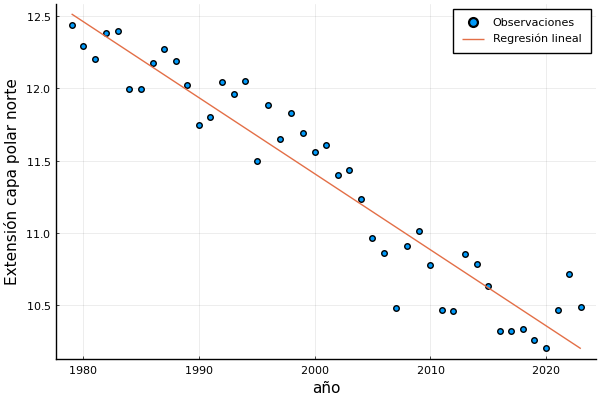

In [91]:
linreg(x,y) = hcat(fill!(similar(x), 1), x) \ y
w = linreg(x,seaice[!,:extent_north])
p=scatter(seaice[!,:year],seaice[!,:extent_north],xlabel="año",ylabel="Extensión capa polar norte",label="Observaciones")
plot!(seaice[!,:year],w[1] .+ w[2].*x,label="Regresión lineal")

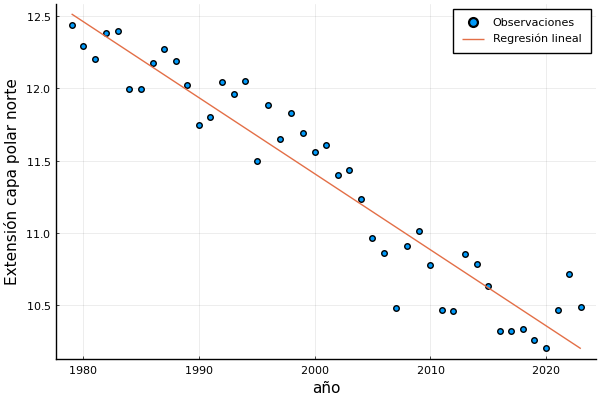

In [92]:
p

Para modelos paramétricos donde el estimador máximo verosimil no se puede calcular analíticamente se utilizan métodos numéricos para la estimación. Métodos populares hacen uso de la función "score" y matriz de información de Fisher que discutimos a continuación.

## Función "score" y matriz de información de Fisher

La función de score está dada por

$$
s(\theta) = \frac{\partial}{\partial \theta} \mathcal{l}(\theta)
$$

en caso de que $\theta\in\mathbb{R}$ y 

$$
s(\pmb{\theta}) = \nabla \mathcal{l}(\pmb{\theta})
$$

en caso de que $\pmb{\theta}\in\mathbb{R}^p$.

La información de Fisher está dada por

$$
\mathcal{I}(\theta) = \mathbb{E}_{f(\cdot;\theta)}\left[ \left( \frac{\partial}{\partial \theta} \log\left( f(Y;\theta) \right) \right)^2  \right] \stackrel{\text{cond. reg.}}{=} - \mathbb{E}_{f(\cdot;\theta)}\left[ \frac{\partial^2}{\partial \theta^2} \log\left( f(Y;\theta) \right)   \right]
$$

en caso de que $\theta\in\mathbb{R}$ y 

$$
\mathcal{I}(\pmb{\theta})(i,j) = \mathbb{E}_{f(\cdot;\pmb{\theta})}\left[ \left( \frac{\partial}{\partial \theta_i} \log\left( f(Y;\pmb{\theta}) \right) \right) \left( \frac{\partial}{\partial \theta_j} \log\left( f(Y;\pmb{\theta}) \right) \right)  \right] \stackrel{\text{cond. reg.}}{=} - \mathbb{E}_{f(\cdot;\pmb{\theta})}\left[ \frac{\partial^2}{\partial \theta_i \partial \theta_j} \log\left( f(Y;\pmb{\theta}) \right)   \right]
$$

en caso de que $\pmb{\theta}\in\mathbb{R}^p$, donde la esperanza es calculada respecto a $Y\sim \mathcal{L}\left( f(\cdot;\pmb{\theta}) \right)$. Alternativamente podemos expresar la matriz de información de Fisher como $\mathcal{I}(\pmb{\theta})=-\mathbb{E}_{f(\cdot;\pmb{\theta})}\left[ \mathrm{d}^2 \log\left( f(Y;\pmb{\theta}) \right)  \right]$, donde $\mathrm{d}^2$ denota el operador para obtener la matriz Hessiana. La información de Fisher para la muestra completa en el caso i.i.d. está dada por $\mathcal{I}_n(\pmb{\theta}) = n\mathcal{I}(\pmb{\theta})$.

Bajo condiciones de regularidad se tiene que

$$
\mathbb{E}_{\pmb{X}\sim P_{\pmb{\theta_0}} }\left[ s(\pmb{\theta_0};\pmb{X}) \right] = 0
$$

y

$$
\text{Var}_{ \pmb{X}\sim P_{\pmb{\theta}_0} }\left[ s(\pmb{\theta_0};\pmb{X}) \right] = -\mathbb{E}_{\pmb{X}\sim P_{\pmb{\theta_0}} }\left[  \mathrm{d}^2 s(\pmb{\theta_0};\pmb{X}) \right]  = \mathcal{I}(\theta)
$$

Aún más se puede realizar un desarrollo de Taylor

$$
\pmb{0}=\nabla s_n(\hat{\pmb{\theta}}_{\text{ML}}) \approx \nabla s_n(\pmb{\theta}_0) + \left(\mathrm{d}^2 s_n(\pmb{\theta}_0) \right) (\hat{\pmb{\theta}}_{\text{ML}}-\pmb{\theta}_0)
$$

(técnicamente hay que considerar el término de error que depende de la muestra y probar que $\mathcal{o}_P(\pmb{1})$ es el orden de tal error aleatorio) y obtener

$$
\sqrt{n}\left( \hat{\pmb{\theta}}_{\text{ML}} - \pmb{\theta}_0  \right)\stackrel{d}{\to} \text{Normal}\left(\pmb{0},\mathcal{I}(\pmb{\theta}_0)^{-1} \right).
$$

https://web.stanford.edu/class/stats300b/ScribeNotes/2021/lecture-03.pdf https://myweb.uiowa.edu/pbreheny/7110/wiki/asymptotic-normality.html

Observamos que en el caso paramétrico el estimador máximo verosimil es asintóticamente insesgado (de hecho bajo la condidición de regularidad de integrabilidad uniforme el sesgo converge a cero, en tal caso decimos que la secuencia es insesgada en el límite).

Si 

$$
\lim_{M\to\infty} \sup_n  \mathbb{E}\left[ |X_n|\pmb{1}\left\{|X_n|>M\right\} \right] = 0
$$

entonces decimos que $\left\{X_n\right\}_{n=1}^\infty$ es uniformemente integrable.

## Fisher score matching

### Método de Newton-Raphson

Sea $h\,:\, \mathbb{R}\to\mathbb{R}$ de clase $\mathcal{C}^2$ entonces para $x_k\in\mathbb{R}$ podemos aproximar vía el teorema de Taylor

$$
h(x_k+x)\approx h(x_k) + h'(x_k)x + \frac{1}{2}h''(x_k)x^2
$$

Proponemos movernos iterativamente a $x_{k+1}=x_k+x^\star$ donde $x^\star$ minimiza la approximación anterior en $x$, es decir cumple la condición de punto crítico

$$
0=\frac{\mathrm{d}}{\mathrm{d}x}\left( h(x_k) + h'(x_k)x +\frac{1}{2}h''(x_k)x^2 \right)=h'(x_k)+h''(x_k)x
$$

con lo cual $x=-\frac{h'(x_k)}{h''(x_k)}$ y se define el esquema iterativo de Newton-Raphson:

$$
x_{k+1} = x_k -\frac{h'(x_k)}{h''(x_k)}.
$$

En dimensiones mayores esto se generaliza a

$$
x_{k+1} = x_k - \left( \nabla^2 h (x_k)  \right)^{-1} \nabla h (x_k).
$$

donde $\nabla h (x)$ es el gradiente de $h$ y $\nabla^2 h (x)$ es la matrix Hessiana, ambos evaluados en $x$. Si $h$ es fuertemente convexa y con Hessiano no singular entonces se puede mostrar que el algoritmo converge a un mínimo global y si la condición inicial es "suficientemente cercana" al mínimo entonces la convergencia será cuadráticamente rápida. En la práctiac para funciones generales $h$ se utilizan distintos puntos inciales aleatorios para el esquema iterativo de Newton-Raphson.

Es usual elegir un parámetro extra $\gamma > 0$, llamado la **tasa de aprendizaje (learning rate)**, para controlar el tamaño del paso en el esquema iterativo de Newton-Raphson

$$
x_{k+1} = x_k - \gamma \left( \nabla^2 h (x_k)  \right)^{-1} \nabla h (x_k).
$$

### Scoring de Fisher o estimación máximo verosimil con Newton-Raphson e Información de Fisher

En vez de usar directamente el método iterativo de Newton-Raphson para maximizar la log-verosimilitud, en el scoring de Fisher utilizamos la información de Fisher para aproximar los diferenciales de segundo orden, que son aleatorios y en consecuencia pueden empeorar la convergencia del algoritmo. En el caso $\theta\in\mathbb{R}$ tomamos

$$
\theta_{k+1} = \theta_k + \gamma \frac{ s(\theta_k)}{ \mathcal{I}_n(\theta_k) }.
$$

y cuando $\pmb{\theta}\in\mathbb{R}^p$ se usa la iteración

$$
\pmb{\theta}_{k+1} = \pmb{\theta}_k + \gamma \mathcal{I}_n(\pmb{\theta}_k)^{-1} s(\pmb{\theta}_k).
$$

### Ejemplo modelo Gamma

2.3) Modelo (paramétrico) Gamma. Consideramos el modelo Gamma

$$
\mathcal{P}_{\text{Gamma}(\alpha,\beta)}= \left\{ \text{distribuciones en }\mathbb{R}\text{ con pdf } f(x)=\frac{\beta^\alpha}{\Gamma(\alpha)}x^{\alpha-1}e^{-\beta x} \right\}_{\alpha>0,\beta>0}
$$

Dadas observaciones $\pmb{X}$, el estimador ML para el parámetro $\alpha$ se puede valuar analíticamente con

$$
\hat{\alpha}_{\text{ML}}=\bar{X}\hat{\beta}_{\text{ML}}.
$$

Sin embargo para el parámetro $\beta$ no se tiene una expresión analítica del estimador ML por lo que se utiliza el esquema iterativo de scoring de Fisher. Denotamos la verosimilitud en términos de $\beta$

$$
L(\alpha,\beta)=\left( \frac{\beta^\alpha}{\Gamma(\alpha)} \right)^n \left(\prod_{i=1}^n X_i\right)^{\alpha-1} e^{-\beta\sum_{i=1}^n X_i }.
$$

La logverosimilitud está dada por

$$
l(\alpha,\beta) = n\alpha\log(\beta) - n\log(\Gamma(\alpha)) + (\alpha-1)\left(\sum_{i=1}^n\log(X_i)\right)
-\beta\sum_{i=1}^n X_i.
$$

y tenemos que 

$$
\frac{\partial}{\partial \beta}l(\alpha,\beta) = \frac{n\alpha}{\beta} - \sum_{i=1}^n X_i
$$

por lo que el estimador ML para $\beta$ está dado en términos de $\alpha$ por $\hat{\beta}_{\text{ML}}(\alpha)= \frac{\alpha}{\bar{X}}$. En lo siquiente consideramos la logverosimilitud $l(\alpha)=l\left(\alpha,\hat{\beta}_{\text{ML}}(\alpha)\right)$. 

Para la logverosimilitud $l(\alpha)=l\left(\alpha,\hat{\beta}_{\text{ML}}(\alpha)\right)$. con la cual
\begin{align*}
s_n(\alpha) =\frac{\partial}{\partial \alpha}l(\alpha) &= n\log\left(\frac{\alpha}{\bar{X}}\right) + n -n\psi(\alpha)+\sum_{i=1}^n\log(X_i)-n
\\ &= n\left( \log(\alpha)-\psi(\alpha) -\log(\bar{X})  + \frac{1}{n}\sum_{i=1}^n\log(X_i)\right),
\end{align*}

donde $\psi(\alpha)= \frac{\mathrm{d}}{\mathrm{d}\alpha}\log\left(\Gamma(\alpha)\right)$ es la función digamma,

\begin{align*}
\frac{\partial^2}{\partial \alpha^2}l(\alpha) &=  n\left( \frac{1}{\alpha}-\psi_1(\alpha) \right),
\end{align*}

donde $\psi_1(\alpha)= \frac{\mathrm{d}^2}{\mathrm{d}\alpha^2}\log\left(\Gamma(\alpha)\right)$ es la función trigamma,

$$
\mathcal{I}_n(\alpha) =  - \mathbb{E}_{f(\cdot;\alpha)}\left[ \frac{\partial^2}{\partial \alpha^2} l(\pmb{X};\alpha)    \right] = n\left( \psi_1(\alpha) -\frac{1}{\alpha} \right).
$$

Finalmente el esquema iterativo de scoring de Fisher está dado por

$$
\alpha_{k+1} = \alpha_k + \gamma \frac{ s_n(\alpha_k)}{ \mathcal{I}_n(\alpha_k) }=
 \alpha_k + \gamma\left( \frac{  \log(\alpha_k)-\psi(\alpha_k) -\log(\bar{X}) 
+ \frac{1}{n}\sum_{i=1}^n\log(X_i) }{  \psi_1(\alpha_k) -\frac{1}{\alpha_k} }\right).
$$

En este caso es recomendable tomar el valor inicial del esquema iterativo $\alpha_0$ como el estimador de momentos

$$
\hat{\alpha}_{\text{MOM}} = \frac{ \bar{X} }{ \frac{1}{n}\sum_{i=1}^n X_i\log(X_i) - \bar{X}\frac{1}{n}\sum_{i=1}^n \log(X_i)}.
$$

In [8]:
using SpecialFunctions

In [9]:
m = 50
γ = 0.77
α_Fs = zeros(m)
α_Fs[1] =  mean(gfr)/( mean(gfr.*log.(gfr))-mean(gfr)*mean(log.(gfr)) )

17.729683006431237

In [10]:
aux = mean(log.(gfr)) - log(mean(gfr))

-0.02795767901194557

In [11]:
for i in 2:m
    α_Fs[i] = α_Fs[i-1] + γ*( log(α_Fs[i-1]) - digamma(α_Fs[i-1]) + aux )/( trigamma(α_Fs[i-1]) - 1.0/α_Fs[i-1] )
end

In [12]:
α_Fs[end]

18.049265735104655

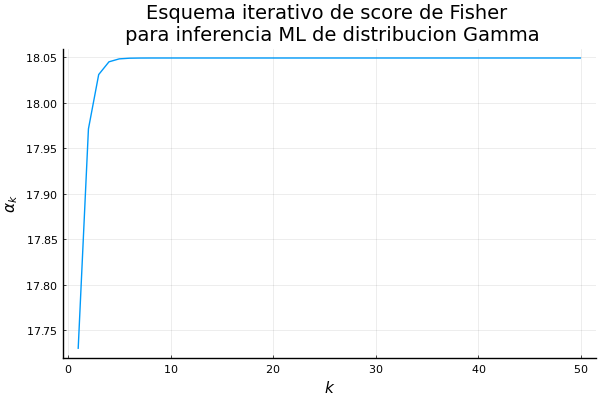

In [14]:
p=plot(1:m,α_Fs,legend=false,xlabel=L"k",ylabel=L"\alpha_k",title="Esquema iterativo de score de Fisher \n para inferencia ML de distribucion Gamma")

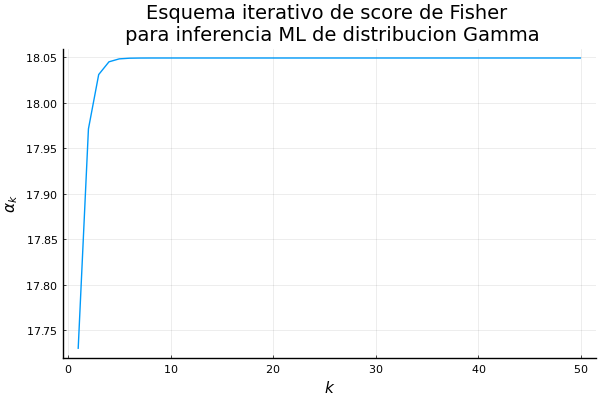

In [15]:
p

In [17]:
D2mle = fit_mle(Gamma,gfr)

Gamma{Float64}(α=18.049265735104452, θ=2.992339112414938)

In [18]:
β_ML = α_Fs[end]/mean(gfr)
θ_ML = 1.0/β_ML

2.992339112414905

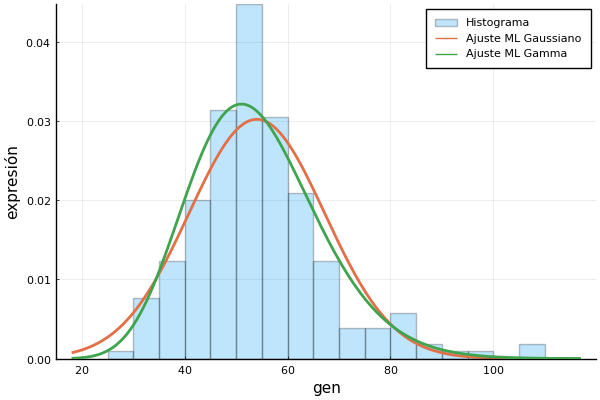

In [19]:
p=histogram(gfr,normalize=true,label="Histograma",alpha=0.25,xlabel="gen",ylabel="expresión")
t_gfr = LinRange(minimum(gfr)-10,maximum(gfr)+10,150)
plot!(t_gfr, pdf.(Dmle,t_gfr),linewidth=2,label="Ajuste ML Gaussiano")
plot!(t_gfr, pdf.(D2mle,t_gfr),linewidth=2,label="Ajuste ML Gamma")

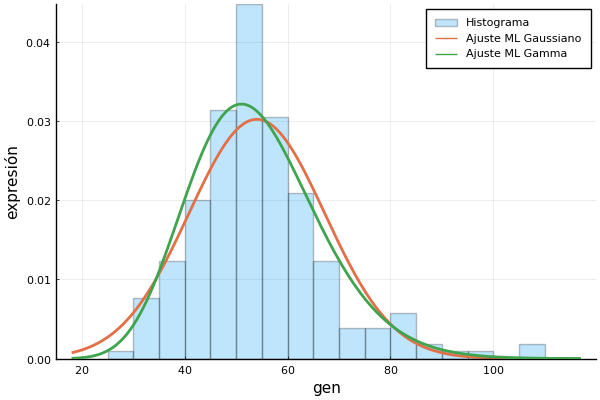

In [20]:
p

### Ejemplo regresión no lineal

2.2) Modelo de regresión no lineal

$$
\mathcal{P}_{\text{Normal}\left( \mu(\pmb{\theta},\pmb{X}),\sigma^2 \right)}= \left\{ \text{distribuciones en }\mathbb{R}\text{ con pdf } f(y)=\frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{\left(y-\mu(\pmb{\theta},\pmb{X}) \right)^2}{2\sigma^2}} \right\}_{\pmb{\theta}\in\pmb{\Theta},\sigma>0}
$$

con $\mu(\pmb{\theta},\pmb{X})$. Al maximizar la verosimilitud se puede ver que la optimización sobre $\pmb{\theta}$ no depende de $\sigma^2$. Nos enfocamos solamente en $\pmb{\theta}$ y consideramos la logverosimilitud perfil

\begin{align*}
l_n(\pmb{\theta}) & = -\frac{1}{2}\sum_{i=1}^n \left( y_i - \mu(\pmb{\theta},\pmb{X}_i) \right)^2
=-\frac{1}{2}\sum_{i=1}^n \left( y_i - \mu_i(\pmb{\theta}) \right)^2.
\end{align*}
donde denotamos $\mu_i(\pmb{\theta})= \mu(\pmb{\theta},\pmb{X}_i)$



$$

$$

Entonces
\begin{align*}
\quad \quad \quad \quad \quad \quad \quad \quad \quad \quad  s_n(\pmb{\theta})&= \sum_{i=1}^n \left( y_i - \mu(\pmb{\theta},\pmb{X}_i) \right) \nabla\mu_i(\pmb{\theta}),
\\ \\
\frac{\partial^2}{\partial \theta_i \partial \theta_j} l_n(\pmb{\theta}) & = \frac{\partial}{\partial \theta_i }\sum_{k=1}^n \left( y_k - \mu_k(\pmb{\theta}) \right) \frac{\partial}{\partial \theta_j } \mu_k(\pmb{\theta})
\\ & =  \sum_{k=1}^n \left( -\left( \frac{\partial}{\partial \theta_i } \mu_k(\pmb{\theta}) \right)\left( \frac{\partial}{\partial \theta_j } \mu_k(\pmb{\theta}) \right) +  \left( y_k - \mu_k(\pmb{\theta}) \right) \frac{\partial^2}{\partial \theta_i \partial \theta_j} \mu_k(\pmb{\theta}) \right),
\\ \\ 
\mathrm{d}^2 l_n(\pmb{\beta}) & = -\pmb{J}_{\pmb{\mu}}(\pmb{\theta})'\pmb{J}_{\pmb{\mu}}(\pmb{\theta})
+\sum_{k=1}^n \left( y_k - \mu_k(\pmb{\theta}) \right) \mathrm{d}^2 \mu_k(\pmb{\theta})
\end{align*}

donde $\pmb{\mu}(\pmb{\theta})=\left(\mu_1(\pmb{\theta}),\ldots,\mu_n(\pmb{\theta})\right)$ y $\pmb{J}_{\pmb{\mu}}$ es la matriz Jacobiana asociada,

\begin{align*}
 \mathcal{I}_n(\pmb{\theta})&=-\mathbb{E}_{\pmb{Y}\sim f(\cdot;\pmb{\beta}|\hat{\pmb{X}})}\left[ \mathrm{d}^2 l_n(\pmb{\beta}) \right]
= \pmb{J}_{\pmb{\mu}}(\pmb{\theta})'\pmb{J}_{\pmb{\mu}}(\pmb{\theta}),
\end{align*}

El algoritmo de scoring de Fisher está dado por

$$
\pmb{\theta}_{k+1} = \pmb{\theta}_k + \gamma \left( \pmb{J}_{\pmb{\mu}}(\pmb{\theta}_k)'\pmb{J}_{\pmb{\mu}}(\pmb{\theta}_k) \right)^{-1} \left( \sum_{i=1}^n \left( y_i - \mu_i(\pmb{\theta}_k) \right) \nabla\mu_i(\pmb{\theta}_k) \right).
$$

Consideramos la función de crecimiento logístico

$$
\mu(\pmb{\beta},x) = \frac{\beta_3}{1+e^{-\beta_1-\beta_2 x}}
$$

<p align="center">
<tr>
<td> <img src="../Art/paramecia.png" alt="Drawing" style="width: 450px;"/> </td>
</tr>
</p>

In [21]:
# Cargamos datos bacteria paramecium creciendo en plato de petri
paramecium = CSV.read("../Datasets/paramecium.csv", DataFrame)

Row,Species,Day,Nt,Nt1,dN,r
,String31,Int64,String15,String15,String15,String31
1,Paramecium caudatum,2,5.849283537,NA,NA,NA
2,Paramecium caudatum,3,13.67289007,5.849283537,7.823606533,1.33753244880528
3,Paramecium caudatum,4,NA,13.67289007,NA,NA
4,Paramecium caudatum,5,35.69788045,NA,NA,NA
5,Paramecium caudatum,6,73.94783955,35.69788045,38.2499591,1.071491041424
6,Paramecium caudatum,7,103.8551913,73.94783955,29.90735175,0.404438478960269
7,Paramecium caudatum,8,128.8565161,103.8551913,25.0013248,0.240732547762396
8,Paramecium caudatum,9,160.2356183,128.8565161,31.3791022,0.243519715957927
9,Paramecium caudatum,10,201.922734,160.2356183,41.6871157,0.26016135577267


In [22]:
N = tryparse.(Float64,paramecium.Nt)
t = paramecium.Day
t = t[@. ! isnothing.(N)]
N = N[@. ! isnothing.(N)];

In [23]:
n = length(N)
μ(β,x) = β[3]/(1.0+exp(-β[1]-β[2]*x))
μ_v(β) = [ μ(β,t[i]) for i in 1:n ]

μ_v (generic function with 1 method)

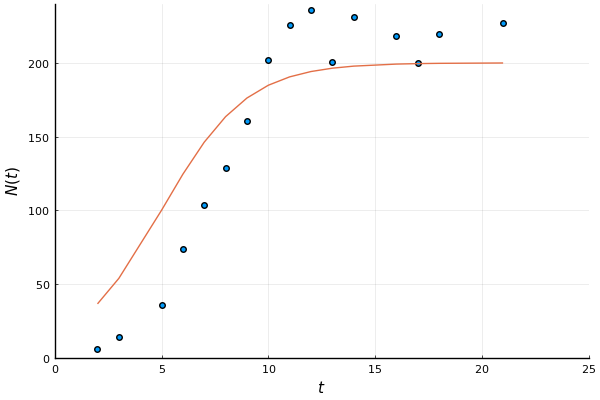

In [24]:
p=scatter(t,N,xlim=(0,25),ylim=(0,240),legend=false,xlabel=L"t",ylabel=L"N(t)")
plot!(t,[μ([-2.5,0.5,200.0],x) for x in t],label="Ajuste manual inicial")

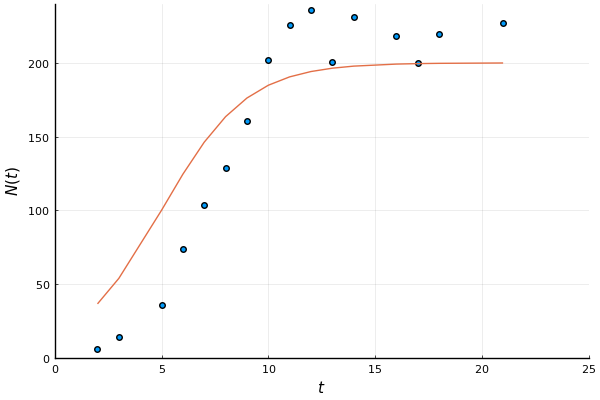

In [25]:
p

In [26]:
t_cent = (t .- minimum(t))/( maximum(t) - minimum(t));

In [27]:
using ForwardDiff

In [28]:
m = 100
γ = 0.77
β_Fs = zeros(m,3)
β_Fs[1,:] = [-2.5,0.5,200.0]

3-element Vector{Float64}:
  -2.5
   0.5
 200.0

In [29]:
for i in 2:100
    J = ForwardDiff.jacobian(μ_v,β_Fs[i-1,:])
    β_Fs[i,:] = β_Fs[i-1,:] + γ*inv(J'*J)*sum( [ (N[j]-μ(β_Fs[i-1,:],t[j]))*J[j,:] for j in 1:n ] )
end

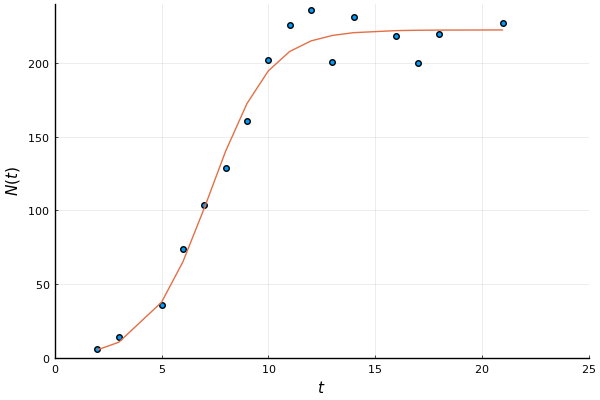

In [31]:
p = scatter(t,N,xlim=(0,25),ylim=(0,240),legend=false,xlabel=L"t",ylabel=L"N(t)")
plot!(t,[μ(β_Fs[end,:],x) for x in t],label="Ajuste manual inicial")

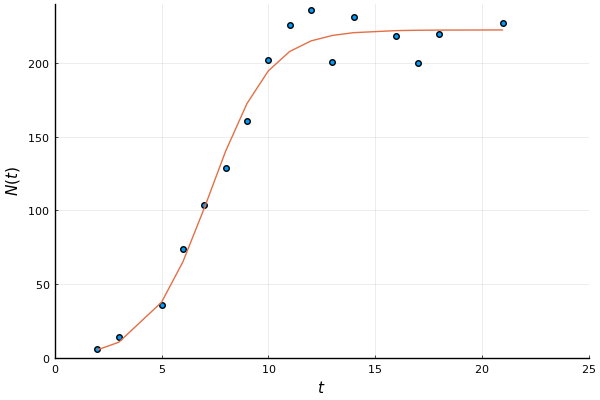

In [32]:
p

### Ejemplo: Modelos Lineales Generalizados (GLM por sus siglas en inglés)
#### Regresión logística

Modelamos probabilidades en un modelo Bernoulli mediante

$$
p_i = \frac{e^{\pmb{X}_i'\pmb{\beta}}}{1+e^{\pmb{X}_i'\pmb{\beta}}}
$$
y observamos que

\begin{align*}
\frac{\partial}{\partial \beta_j }p_i = \frac{ X_{i,j}e^{\pmb{X}_i'\pmb{\beta}}(1+e^{\pmb{X}_i'\pmb{\beta}})-
X_{i,j}e^{\pmb{X}_i'\pmb{\beta}}e^{\pmb{X}_i'\pmb{\beta}}
}{(1+e^{\pmb{X}_i'\pmb{\beta}})^2} = \frac{ e^{\pmb{X}_i'\pmb{\beta}}X_{i,j} }{(1+e^{\pmb{X}_i'\pmb{\beta}})^2}
= p_i(1-p_i)X_{i,j},
\end{align*}

\begin{align*}
l_n(\pmb{\beta}) & = \sum_{i=1}^n \left( y_i\log(p_i) + (1-y_i)\log(1-p_i) \right)
\\ & = \sum_{i=1}^n \left( y_i\pmb{X}_i'\pmb{\beta} - \log\left(1+e^{\pmb{X}_i'\pmb{\beta}}\right) \right),
\end{align*}

\begin{align*}
s_n(\pmb{\beta}) & = \sum_{i=1}^n \left( y_i\log(p_i) + (1-y_i)\log(1-p_i) \right)
\\ & = \sum_{i=1}^n \left( y_i\pmb{X}_i - \frac{e^{\pmb{X}_i'\pmb{\beta}}}{1+e^{\pmb{X}_i'\pmb{\beta}}} \pmb{X_i} \right)
\\ & = \sum_{i=1}^n (y_i-p_i)\pmb{X}_i = \hat{\pmb{X}}'(\pmb{y}-\pmb{p}),
\end{align*}

\begin{align*}
\frac{\partial^2}{\partial \beta_i \partial \beta_j} l_n(\pmb{\beta}) & = \frac{\partial}{\partial \beta_i }\sum_{k=1}^n (y_k-p_k) X_{k,j} = -\sum_{k=1}^n X_{k,j}\frac{\partial}{\partial \beta_i } p_k 
= -\sum_{k=1}^n X_{k,j}  \frac{ X_{k,i}e^{\pmb{X}_k'\pmb{\beta}} }{(1+e^{\pmb{X}_k'\pmb{\beta}})^2}
=-\sum_{k=1}^n p_k(1-p_k) X_{k,j}X_{k,i},
\end{align*}

\begin{align*}
\mathrm{d}^2 l_n(\pmb{\beta}) & = \sum_{i=1}^n \left( y_i\log(p_i) + (1-y_i)\log(1-p_i) \right)
\\ & = -\sum_{k=1}^n p_k(1-p_k) \pmb{X}_k\pmb{X}_k'= - \hat{\pmb{X}}' \pmb{W} \hat{\pmb{X}},
\end{align*}
con $\pmb{W}=\text{diag}\left(p_1(1-p_1),\ldots,p_d(1-p_d)\right)$,

$$
\mathcal{I}_n(\pmb{\theta})=-\mathbb{E}_{Y\sim f(\cdot;\pmb{\beta}|\hat{\pmb{X}})}\left[ \mathrm{d}^2 l_n(\pmb{\beta}) \right]
= \hat{\pmb{X}}' \pmb{W} \hat{\pmb{X}}.
$$

El algoritmo de scoring de Fisher

$$
\pmb{\theta}_{k+1} = \pmb{\theta}_k + \gamma \left( \hat{\pmb{X}}' \pmb{W} \hat{\pmb{X}} \right)^{-1}  \hat{\pmb{X}}'(\pmb{y}-\pmb{p}).
$$

In [34]:
using RDatasets

In [35]:
# Cargamos datos de deudas
default = dataset("ISLR", "Default")

Row,Default,Student,Balance,Income
,Cat…,Cat…,Float64,Float64
1,No,No,729.526,44361.6
2,No,Yes,817.18,12106.1
3,No,No,1073.55,31767.1
4,No,No,529.251,35704.5
5,No,No,785.656,38463.5
6,No,Yes,919.589,7491.56
7,No,No,825.513,24905.2
8,No,Yes,808.668,17600.5
9,No,No,1161.06,37468.5


In [36]:
X = Matrix(default[:,2:4])

10000×3 Matrix{Any}:
 "No"    729.526  44361.6
 "Yes"   817.18   12106.1
 "No"   1073.55   31767.1
 "No"    529.251  35704.5
 "No"    785.656  38463.5
 "Yes"   919.589   7491.56
 "No"    825.513  24905.2
 "Yes"   808.668  17600.5
 "No"   1161.06   37468.5
 "No"      0.0    29275.3
 "Yes"     0.0    21871.1
 "Yes"  1220.58   13268.6
 "No"    237.045  28251.7
 ⋮                
 "No"      0.0    41740.7
 "Yes"   999.281  20013.4
 "No"    372.379  25374.9
 "No"    658.8    54802.1
 "No"   1111.65   45490.7
 "No"    938.836  56633.4
 "Yes"   172.413  14955.9
 "No"    711.555  52992.4
 "No"    757.963  19660.7
 "No"    845.412  58636.2
 "No"   1569.01   36669.1
 "Yes"   200.922  16863.0

In [37]:
X[:,2:3] = (X[:,2:3] .- mean(X[:,2:3],dims=1))./std(X[:,2:3],dims=1)

10000×2 Matrix{Float64}:
 -0.218824    0.813147
 -0.037614   -1.60542
  0.492386   -0.131206
 -0.632861    0.164023
 -0.102786    0.370897
  0.174098   -1.95142
 -0.0203871  -0.645722
 -0.0552131  -1.19344
  0.673295    0.296293
 -1.727      -0.31805
 -1.727      -0.873227
  0.796355   -1.51825
 -1.23695    -0.394799
  ⋮          
 -1.727       0.616625
  0.338849   -1.01252
 -0.957166   -0.610505
 -0.36504     1.59599
  0.571147    0.897805
  0.213889    1.73331
 -1.37056    -1.39173
 -0.255977    1.46029
 -0.160036   -1.03896
  0.02075     1.88347
  1.51667     0.236351
 -1.31163    -1.24874

In [38]:
cat_map = Dict("No"=>0.0, "Yes"=>1.0)

Dict{String, Float64} with 2 entries:
  "Yes" => 1.0
  "No"  => 0.0

In [39]:
X[:,1] = [ cat_map[v] for v in X[:,1] ]
y = [ cat_map[v] for v in default[:,1] ]

10000-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [40]:
X = Float64.(hcat(fill!(similar(X[:,1]), 1), X))

10000×4 Matrix{Float64}:
 1.0  0.0  -0.218824    0.813147
 1.0  1.0  -0.037614   -1.60542
 1.0  0.0   0.492386   -0.131206
 1.0  0.0  -0.632861    0.164023
 1.0  0.0  -0.102786    0.370897
 1.0  1.0   0.174098   -1.95142
 1.0  0.0  -0.0203871  -0.645722
 1.0  1.0  -0.0552131  -1.19344
 1.0  0.0   0.673295    0.296293
 1.0  0.0  -1.727      -0.31805
 1.0  1.0  -1.727      -0.873227
 1.0  1.0   0.796355   -1.51825
 1.0  0.0  -1.23695    -0.394799
 ⋮                     
 1.0  0.0  -1.727       0.616625
 1.0  1.0   0.338849   -1.01252
 1.0  0.0  -0.957166   -0.610505
 1.0  0.0  -0.36504     1.59599
 1.0  0.0   0.571147    0.897805
 1.0  0.0   0.213889    1.73331
 1.0  1.0  -1.37056    -1.39173
 1.0  0.0  -0.255977    1.46029
 1.0  0.0  -0.160036   -1.03896
 1.0  0.0   0.02075     1.88347
 1.0  0.0   1.51667     0.236351
 1.0  1.0  -1.31163    -1.24874

In [41]:
r(z::Float64) = z/(1.0+z)

r (generic function with 1 method)

In [47]:
p_f(z::Float64) = r(exp(z))

p_f (generic function with 1 method)

In [43]:
using LinearAlgebra

In [44]:
W(p::Array{Float64,1}) = diagm( p.*(1.0.-p) )

W (generic function with 1 method)

In [45]:
m = 50
γ = 0.77
β_Fs = zeros(m,4)
β_Fs[1,:] = rand(Uniform(),4);

In [48]:
for i in 2:m
    p_loc = p_f.(X*β_Fs[i-1,:])
    W_loc = W(p_loc)
    β_Fs[i,:] = β_Fs[i-1,:] + γ*inv(X'*W_loc*X)*X'*(y.-p_loc)
end

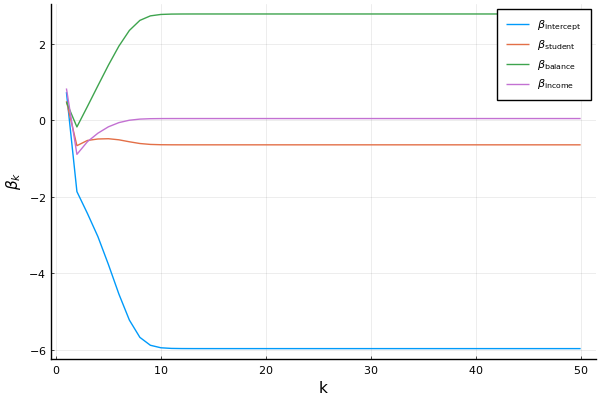

In [50]:
p=plot(β_Fs,dim=1,
    xlabel="k", ylabel=L"\beta_k",
    label=[L"\beta_{\mathrm{intercept}}" L"\beta_{\mathrm{student}}" L"\beta_{\mathrm{balance}}" L"\beta_{\mathrm{income}}"])

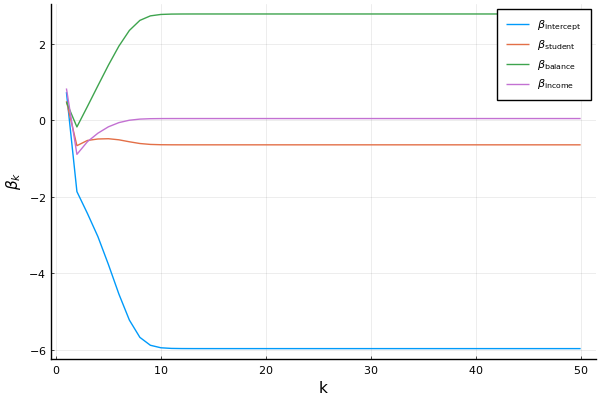

In [52]:
p

In [53]:
X[:,2:3] = (X[:,2:3] .- mean(X[:,2:3],dims=1))./std(X[:,2:3],dims=1)

10000×2 Matrix{Float64}:
 -0.645904  -0.218824
  1.54806   -0.037614
 -0.645904   0.492386
 -0.645904  -0.632861
 -0.645904  -0.102786
  1.54806    0.174098
 -0.645904  -0.0203871
  1.54806   -0.0552131
 -0.645904   0.673295
 -0.645904  -1.727
  1.54806   -1.727
  1.54806    0.796355
 -0.645904  -1.23695
  ⋮         
 -0.645904  -1.727
  1.54806    0.338849
 -0.645904  -0.957166
 -0.645904  -0.36504
 -0.645904   0.571147
 -0.645904   0.213889
  1.54806   -1.37056
 -0.645904  -0.255977
 -0.645904  -0.160036
 -0.645904   0.02075
 -0.645904   1.51667
  1.54806   -1.31163

In [54]:
min_bal = minimum(X[:,3])
max_bal = maximum(X[:,3]);

In [55]:
stud_ind = X[:,2] .== 1.0
ord_bal_stud = sortperm( X[:,3][stud_ind] );

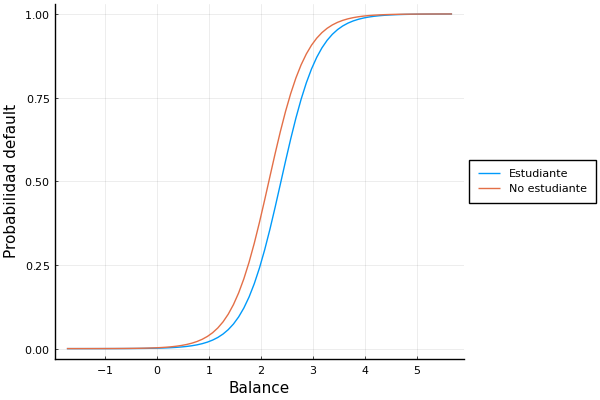

In [73]:
t_p = collect(min_bal:0.1:max_bal+2.0)
p=plot(t_p,p_f.( [ dot(β_Fs[end,:],[1.0,1.0,v,0.0]) for v in t_p ] ),legend=:outerright,label="Estudiante",xlabel="Balance",ylabel="Probabilidad default")
plot!(t_p,p_f.( [ dot(β_Fs[end,:],[1.0,0.0,v,0.0]) for v in t_p ] ),legend=:outerright,label="No estudiante")
#scatter!(X[:,3][stud_ind], y[stud_ind] )

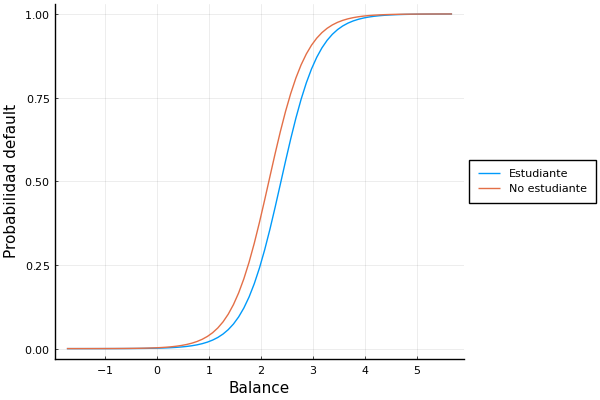

In [74]:
p

## Familia Exponencial

$$
f_{\pmb{\theta}}(x)=\exp\left( \pmb{\theta}'\pmb{y}(x)-\psi(\theta) \right)f_0(x)
$$

In [ ]:
std_gfr = (gfr .- mean(gfr))./std(gfr);

In [ ]:
function negproplf(θ)
    f_k(x) = exp( θ' * x[1].^(1:7) )
    c = hcubature( f_k, [0.0], [500] )[1]
    return -θ'* s + log(c)
end

In [ ]:
s = [mean(std_gfr.^i) for i in 1:7]

In [ ]:
negproplf([1.1,-0.5,1.1,0.1,1.1,0.1,-0.5])

In [ ]:
optimum = optimize(negproplf,[1.1,1.1,1.1,1.1,1.1,1.1,-1.1], LBFGS())

In [ ]:
θmle = optimum.minimizer

### Divergencia contrastiva

Observemos que expresando una densidad en término sde su kernel y constante de normalización

$$
f_{\pmb{\theta}}(\pmb{x}) = \frac{ f^{(\text{ker})}_{\pmb{\theta}}(\pmb{x}) }{C(\theta)}
$$

La logverosimilitud está dada por

$$
\mathcal{l}(\pmb{\theta};\pmb{x}) =\sum_{i=1}^n \log\left( f_\theta(\pmb{x}_i) \right).
$$

La función de score está dada por

$$
s(\pmb{\theta} ;\pmb{x}) = \nabla \mathcal{l}(\pmb{\theta};\pmb{x})
$$

Bajo condiciones de regularidad

\begin{align*}
\nabla_{\pmb{\theta}} \log\left( C(\pmb{\theta}) \right) &= \frac{\nabla_{\pmb{\theta}}\, C(\pmb{\theta})}{C(\pmb{\theta})}
= \frac{\int \nabla_{\pmb{\theta}} \, f^{(\text{ker})}_{\pmb{\theta}}(\pmb{x}) \mathrm{d}x }{C(\pmb{\theta})}
= \int f_{\pmb{\theta}}(\pmb{x}) \nabla_{\pmb{\theta}} \, \log\left( f^{(\text{ker})}_{\pmb{\theta}}(\pmb{x}) \right) \mathrm{d}x
\\ & = \mathbb{E}_{f_{\pmb{\theta}}}\left[ \nabla_{\pmb{\theta}} \, \log\left( f^{(\text{ker})}_{\pmb{\theta}}(\pmb{X}) \right)  \right]
\end{align*}

Entonces con la notación $\tilde{s}(\pmb{\theta};\pmb{x})=\nabla_{\pmb{\theta}} \, \log\left( f^{(\text{ker})}_{\pmb{\theta}}(\pmb{x}) \right)$

\begin{align*}
s(\pmb{\theta} ;\pmb{x}) & \propto \left(\frac{1}{n}\sum_{i=1}^n \tilde{s}(\pmb{\theta};\pmb{X}_i) \right)  - \mathbb{E}_{\pmb{X} \sim f_{\pmb{\theta}}}\left[ \tilde{s}(\pmb{\theta};\pmb{X}  \right]
\end{align*}

Con lo cual podemos utilizar técnicas de simulación para poder estimar la esperanza en la expresión anterior. Particularmente el uso de técnicas de MCMC (siglas de Márkov chain Monte-Carlo) son utilizadas en el siguiente algoritmo ques es popular en aprendizaje de máquina

**Divergencia contrastiva persistente**

Dados datos $\pmb{X}=\left\{ X_i \right\}_{i=1}^n$ una tasa de aprendizaje $\gamma>0$, enteros $m,k>0$ y cadena de Markov $\pmb{Y}$ que en $k$ pasos se le diagnostica convergencia a su distribución estacionaria $f_{\pmb{\theta}_j}$ al ser iniciada en una v.a. con distribución $f_{\pmb{\theta}_{j-1}}$, entonces podemos 

0) Elegimos valores iniciales $\pmb{\theta}_0,\pmb{\theta}_1$ y muestreamos valores inciales $\tilde{\pmb{Y}}=\left\{ \tilde{\pmb{Y}}_i \right\}_{i=1}^m \stackrel{\text{i.i.d.}}{\sim}f_{\pmb{\theta}_0}$. 

1) Hasta evaluar convergencia del esquema iterativo en $\pmb{\theta}_j$
    
   1.1) Muestreamos de $\pmb{X}$ con remplazo una submuestra $\tilde{\pmb{X}}=\left\{ \tilde{\pmb{X}}_i \right\}_{i=1}^m$ y fijamos $\pmb{\theta}'= \frac{1}{n}\sum_{i=1}^m \tilde{s}(\pmb{\theta};\tilde{\pmb{X}}_i) $
   
   1.2) Para $1\leq i\leq m$ corremos $k$ pasos de la cadena de Márkov $\pmb{Y}$ con $\pmb{Y}_0=\tilde{\pmb{Y}}_i$ y actualizamos $\tilde{\pmb{Y}}_i=Y_k$.
    
   1.3) Tomamos $\widehat{\tilde{s}}(\pmb{\theta})=\frac{1}{m}\sum_{i=1}^m \tilde{s}(\pmb{\theta};\tilde{\pmb{Y}}_i) $, e iteramos $\pmb{\theta} \to \pmb{\theta} +\gamma\left( \pmb{\theta}'- \widehat{\tilde{s}}(\pmb{\theta}) \right)$.

In [ ]:
@inline function MetropolisHasting_logscale_randwalk( lf::Function, l::Int64, v₀::Float64, prop_σ::Float64=0.5)
    v = zeros(l+1)
    v[1] = v₀
    log_π_v = lf( v₀ )
    for i in 2:(l+1)
        v_prop = v[i-1] + rand( Normal(0,prop_σ) )
        log_π_v_prop = lf( v_prop )
        u = rand(Uniform())
        if log(u) < min( log_π_v_prop - log_π_v, 0.0)
            v[i] = v_prop
            log_π_v = log_π_v_prop
        else
            v[i] = v[i-1]
        end
    end
    return v
end

In [ ]:
Daux = fit_mle(Normal,gfr)

In [ ]:
σ_prop = std(Daux)/2

In [ ]:
k = 50
m = 20
γ = 0.001
θ = [1.1,-0.5,1.1,0.1,1.1,0.1,-0.5]
y = [ rand(Daux) for _ in 1:m ];

In [ ]:
1.0.^(1:7)

In [ ]:
kerlf(x::Float64) = θ' * x.^(1:7)

In [ ]:
kerlf(100000)

In [ ]:
γ

In [ ]:
for i in 1:100
    kerlf(x) = θ' * x[1].^(1:7)
    y = [ MetropolisHasting_logscale_randwalk( kerlf, k, v, σ_prop)[end] for v in y ]
    s2 =  [mean( y.^i) for i in 1:7]
    θ = θ + γ*(s-s2)
end

In [ ]:
θ

In [ ]:
θ

In [ ]:
mean(gfr)

In [ ]:
θ

In [ ]:
kerlf(x) = θ' * x[1].^(1:7)

In [ ]:
z = MetropolisHasting_logscale_randwalk( kerlf, 300, y[1], Daux)

In [ ]:
plot(z)

In [ ]:
y

In [21]:
using Polynomials

In [26]:
pol = Polynomial([1.,1.2,-0.8])

Polynomial(1.0 + 1.2*x - 0.8*x^2)

In [27]:
pol(-Inf)

-Inf

# Extra: Pruebas de hipótesis y bondad de ajuste*

#### Bibliografía

* Younes, L. (1998). *On the convergence of Markovian stochastic algorithms with rapidly
decreasing ergodicity rates.* In Stochastics and Stochastics Models, pages 177–228.


#### Bibliografía

* Wasserman, L. (2013). All of statistics: a concise course in statistical inference. Springer Science & Business Media.
* Casella, G., & Berger, R. (2024). Statistical inference. CRC Press.
* Lange, K., Chambers, J., & Eddy, W. (2010). Numerical analysis for statisticians (Vol. 1). New York: springer.